# **GRIP@The Spark Foundation- Data Science & Business Analytics Internship**

#**Author - Mohit Kaushal Jain**

**Task 1**: Prediction using Supervised ML

 **Aim**: To predict the percentage of a student based on the no. of study hours.



In [3]:
#Importing Libraries required for data analysis
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use("ggplot")

In [4]:
#Reading the data from Dataset
dataset = "http://bit.ly/w-data"
student_data = pd.read_csv(dataset)
print("Data imported successfully")
student_data.head(10) #if no number is written then it will display first 5 headings


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
student_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#To identify the number of rows and columns of the data
student_data.shape

(25, 2)

In [8]:
#Size of dataframe which is calculated by number of rows and columns
student_data.size

50

In [9]:
#Summary Of Statistics
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#to get the summary of dataframe
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
#to find correlation
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


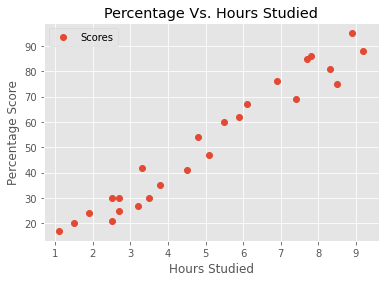

In [13]:
# Plotting the graph for distribution of scores
student_data.plot(x='Hours', y='Scores',style='o')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Percentage Vs. Hours Studied')  
plt.show()

**It is evident from the graph that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Preparing the data**

In [14]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# **Training the Algorithm**

In [16]:
#training the data
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("The data has been trained")

The data has been trained


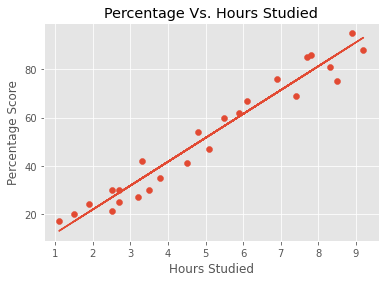

In [17]:
# Plotting the regression line
regression_line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Percentage Vs. Hours Studied') 
plt.show()

# **Making Predictions**

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted Score
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**To find Predicted Score if student studies 9.25 hours a day**



In [20]:
# Predicted Score for a student who studies for 9.25 hrs/ day
df = np.array(9.25)
df = df.reshape(-1, 1)
pred = regressor.predict(df)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


# **Evaluating the model**

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
